#Downloading data from Google Drive and importing libs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
from IPython.display import Image
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as ex
from scipy import signal

#Convert image to negative

$$s = L - 1 - r,$$ $L$ – number of grayscale

Input image

![alt text](https://drive.google.com/uc?id=1f6TqhxNByl2k9jsdNuceYFT2cetDWPVb)

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic1.jpg .
!ls

gdrive	pic1.jpg  sample_data


File reading and image processing

In [ ]:
pic1_orig = cv2.imread('pic1.jpg')
pic1_trans = 255 - pic1_orig

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4eea419438>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f4eea406ac8>)

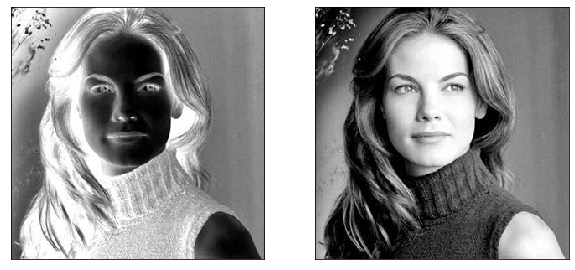

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic1_orig)
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic1_trans)

#Logarithmic transformation

$$s=c*log(1+r),$$
$c$ - Constanta, $r>=0$

Input image

![alt text](https://drive.google.com/uc?id=1q7Ykgb79LgspiGRsRF_z2_dAn2fEr_vz)

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic2.jpg .
!ls

gdrive	pic1.jpg  pic2.jpg  sample_data


File reading and image processing

In [ ]:
pic2_orig = cv2.imread('pic2.jpg')
pic2_trans = 50 * np.log(1 + pic2_orig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ee86dd080>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f4ee8698588>)

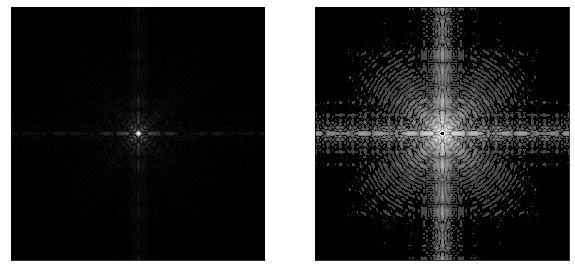

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow((pic2_orig).astype(np.uint8))
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow((pic2_trans).astype(np.uint8))

#Power Law (Gamma) Transformation

$$s=cr^\gamma,$$ $c,\gamma$ - Const

Input image

![alt text](https://drive.google.com/uc?id=14G05IgAnk9jmPm0ATHFmDvo5ntwj8hAE)

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic3.jpg .
!ls

gdrive	pic1.jpg  pic2.jpg  pic3.jpg  sample_data


File reading and image processing

In [ ]:
pic3_orig = cv2.imread('pic3.jpg',0)
pic3_trans = 40 * (pic3_orig) ** 0.3

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ee864bac8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f4ee86089b0>)

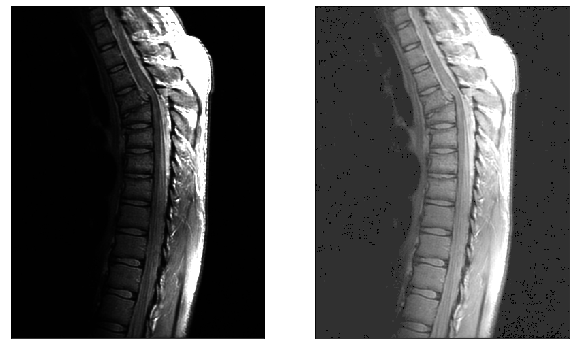

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic3_orig, cmap='gray') 
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic3_trans, cmap='gray')

#Contrast stretching

$$s=\frac{1}{1+(m/r)^E},$$ $m, E - Const$

Input image

![alt text](https://drive.google.com/uc?id=1dMrPyO5szYVAM3VOLue-xl6kVr8s6x5q)

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic4.jpg .
!ls

gdrive	pic1.jpg  pic2.jpg  pic3.jpg  pic4.jpg	sample_data


File reading and image processing

In [ ]:
pic4_orig = cv2.imread('pic4.jpg',0)
pic4_trans = 1 / (1 + (30 / pic4_orig) ** 1)

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ee74c2588>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f4ee7480a20>)

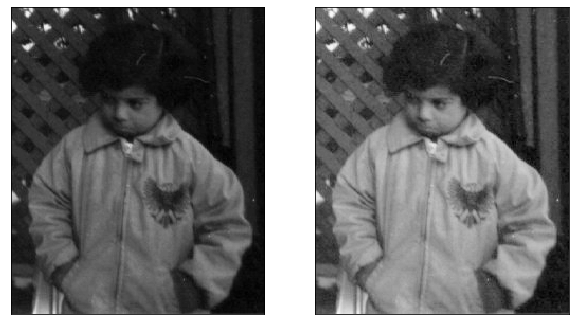

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic4_orig, cmap='gray')
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic4_trans, cmap='gray')

#Histogram equalization

$$s=T(r_k)=\sum_{j=0}^k\frac{n_j}{n}=\frac{1}{n}\sum_{j=0}^kn_j,$$ $k=0,1,...,L-1,$

$
n=M*n$

##Input image

![alt text](https://drive.google.com/uc?id=1q5WpPd7Rm0KD4XIgKPa3qdzCAAKQaT-M)

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic5.jpg .
!ls

gdrive	pic1.jpg  pic2.jpg  pic3.jpg  pic4.jpg	pic5.jpg  sample_data


File reading and image processing

In [ ]:
pic5_orig = cv2.imread('pic5.jpg')
pic5_trans = ex.equalize_hist(pic5_orig)

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ee7efacc0>,
 (array([ 1431.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 50958.,  2853.,     0.,  5751.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0., 26865.,     0.,     0.,
          6387.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         48684.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0., 30564.,     0.,     0.,  9981.,     0.,
             0.,     0.,     0.,     0., 17253.,  4218.,     0.,     0.,
             0.,     0., 12672.,  3798.,     0.,     0.,     0.,     0.,
         12996.,     0.,  7617.,     0.,     0.,  8490.,     0.,     0.,
             0.,     0.,     0., 16587.,     0.,  6423.,     0.,     0.,
             0., 10959.,     0.,  6561.,     0.,     0.,     0.,

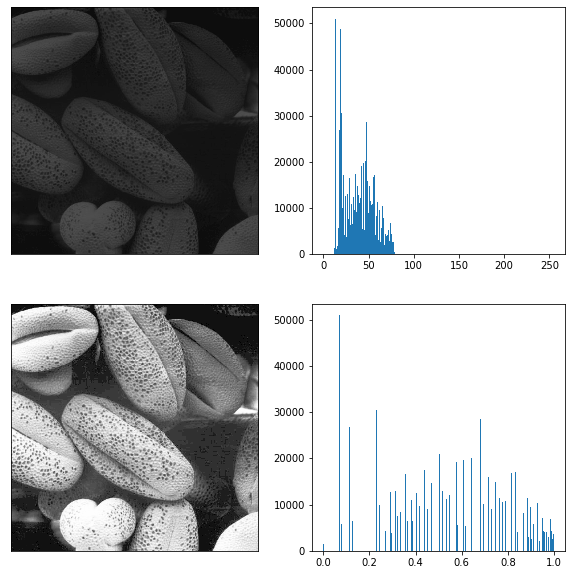

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic5_orig)
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(pic5_trans)
plt.subplot(2,2,2), plt.hist(pic5_orig.ravel(), bins=256, range=(0,255))
plt.subplot(2,2,4), plt.hist(pic5_trans.ravel(), bins=256, range=(0,1))

#Image Smoothing

##Box Filter
$\frac{1}{9} \times
 \begin{bmatrix}
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  1 & 1 & 1
 \end{bmatrix}$

##Input image

![alt text](https://drive.google.com/uc?id=1UsdhCV1rg_5qw6c4BU-5DtWAoWgDDKfz)

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic6.jpg .
!ls

gdrive	  pic2.jpg  pic4.jpg  pic6.jpg	pic8.jpg  sample_data
pic1.jpg  pic3.jpg  pic5.jpg  pic7.jpg	pic9.jpg


File reading and image processing

In [ ]:
pic6_orig = cv2.imread('pic6.jpg',0)
box_Filter = [[1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9]]
pic6_trans = signal.convolve2d(pic6_orig, box_Filter, mode='same', boundary='fill', fillvalue=0)

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7f239a588>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fc7f2384c88>)

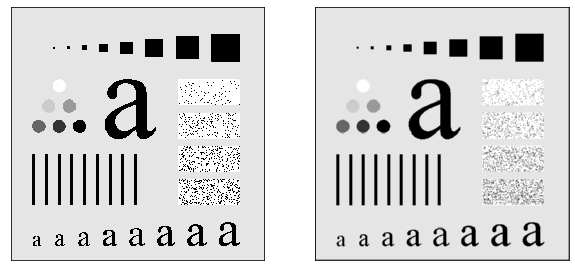

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic6_orig, cmap='gray')
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic6_trans, cmap='gray')

#Laplacian sharpening

##Laplacian
$\begin{bmatrix}
  0 & 1 & 0 \\
  1 & -4 & 1 \\
  0 & 1 & 0
 \end{bmatrix}$

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic7.jpg .
!ls

gdrive	  pic2.jpg  pic4.jpg  pic6.jpg	sample_data
pic1.jpg  pic3.jpg  pic5.jpg  pic7.jpg


File reading and image processing

In [ ]:
pic7_orig = cv2.imread('pic7.jpg',0)
Laplasian = [[0, 1, 0],
             [1, -4, 1],
             [0, 1, 0]]
pic7_Laplas = signal.convolve2d(pic7_orig, Laplasian, mode='same', boundary='fill', fillvalue=0)
pic7_trans = pic7_orig - pic7_Laplas

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7f1b41240>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fc7f1aff470>)

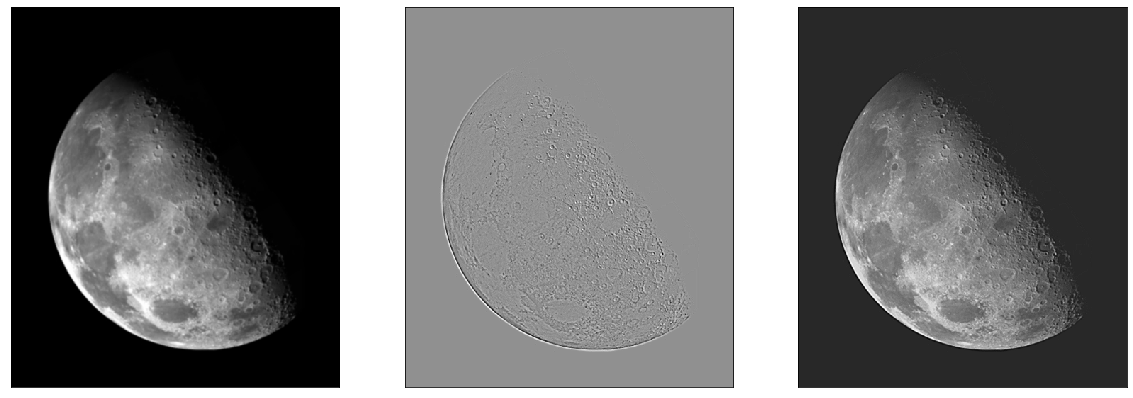

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic7_orig, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic7_Laplas, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(pic7_trans, cmap='gray')

#Edge Detection with Sobel Operators

##Sobel operators
$G_x=
\begin{bmatrix}
  1 & 0 & -1 \\
  2 & 0 & -2 \\
  1 & 0 & -1
 \end{bmatrix}
G_y=
\begin{bmatrix}
  1 & 2 & 1 \\
  0 & 0 & 0 \\
  -1 & -2 & -1
 \end{bmatrix}$

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic8.jpg .
!ls

gdrive	  pic2.jpg  pic4.jpg  pic6.jpg	pic8.jpg
pic1.jpg  pic3.jpg  pic5.jpg  pic7.jpg	sample_data


File reading and image processing

In [ ]:
pic8_orig = cv2.imread('pic8.jpg',0)
Gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
pic8_Gx = signal.convolve2d(pic8_orig, Gx, mode='same', boundary='fill', fillvalue=0)
pic8_Gy = signal.convolve2d(pic8_orig, np.flip(Gx.T, axis=0), mode='same', boundary='fill', fillvalue=0)
pic8_trans = np.sqrt(pic8_Gx**2+pic8_Gy**2)

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ee771bac8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f4ee76d9b38>)

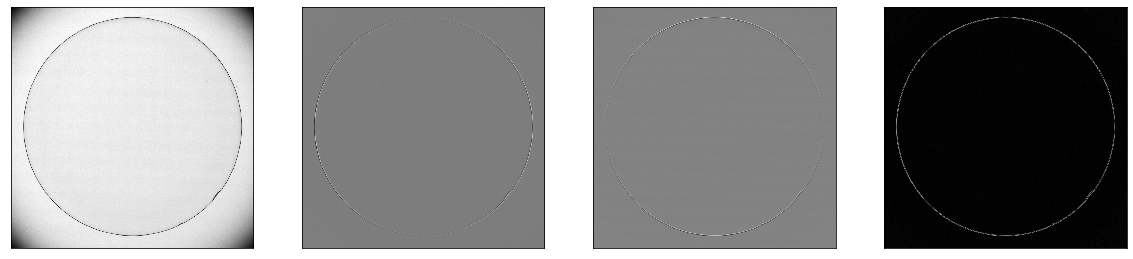

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1,4,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic8_orig, cmap='gray')
plt.subplot(1,4,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic8_Gx, cmap='gray')
plt.subplot(1,4,3), plt.xticks([]), plt.yticks([]), plt.imshow(pic8_Gy, cmap='gray')
plt.subplot(1,4,4), plt.xticks([]), plt.yticks([]), plt.imshow(pic8_trans, cmap='gray')

#Median Filtering

Copy data to colab

In [ ]:
!cp /content/gdrive/'My Drive'/CV/Lab1/pic9.jpg .
!ls

gdrive	  pic2.jpg  pic4.jpg  pic6.jpg	pic8.jpg  sample_data
pic1.jpg  pic3.jpg  pic5.jpg  pic7.jpg	pic9.jpg


File reading and image processing

In [ ]:
pic9_orig = cv2.imread('pic9.jpg',0)
pic9_trans3 = signal.medfilt(pic9_orig, [3,3])
pic9_trans5 = signal.medfilt(pic9_orig, [5,5])

Display result

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ee7659c18>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f4ee7615c88>)

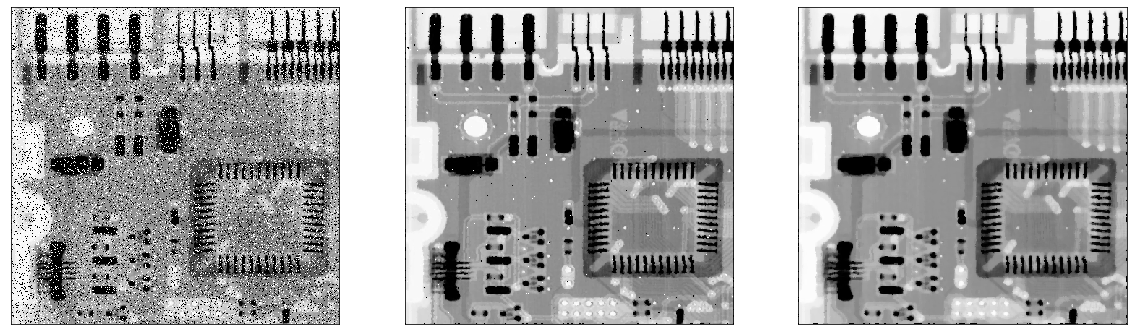

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic9_orig, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic9_trans3, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(pic9_trans5, cmap='gray')